In [1]:
import pandas as pd
import numpy as np
from pylab import *
import seaborn as sns

In [2]:
colnames = ["Wall time","Step","Value"]
data1 = pd.read_csv("time_stamp.csv")
r1 = data1.Value.rolling(window=20)
r2 = data1.Value.rolling(window=1)
print(type(data1.Value))

<class 'pandas.core.series.Series'>


In [3]:
data2 = pd.read_csv("rewards.csv")
r3 = data2.Value.rolling(window=50)
r4 = data2.Value.rolling(window=20)
# print(data.Value)

In [4]:

x1 = np.array(data1.Step.to_list())
y1 = np.array(r1.mean().to_list())
y2 = np.array(r2.mean().to_list())

x2 = np.array(data2.Step.to_list())
y3 = np.array(r3.mean().to_list())
y4 = np.array(r4.mean().to_list())
# print(y3)

In [5]:
def perc(data):
   median = np.zeros(data.shape[0])
   perc_25 = np.zeros(data.shape[0])
   perc_75 = np.zeros(data.shape[0])
   for i in range(0, len(median)):
       median[i] = np.median(data[:i])
       perc_25[i] = np.percentile(data[:i], 25)
       perc_75[i] = np.percentile(data[:i], 75)
   return median, perc_25, perc_75

In [6]:
# med_low_mut, perc_25_low_mut, perc_75_low_mut = perc(np.array([data1.Value.to_list()]))
# fill_between(x1, perc_25_low_mut, perc_75_low_mut, alpha=0.25, linewidth=1, color='#B22400')


-0.021618962287902832 0.05584076046943665


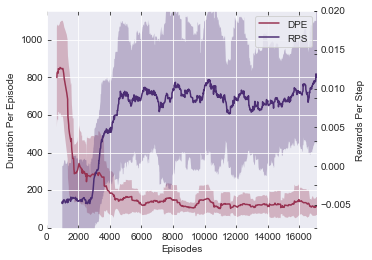

In [7]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

with sns.axes_style("darkgrid"):
    host = host_subplot(111, axes_class=AA.Axes)
    subplots_adjust(right=0.75)
    par1 = host.twinx()
    par2 = host.twinx()
    par1.axis["right"].toggle(all=True)
    host.set_xlabel("Episodes")
    host.set_ylabel("Duration Per Episode")
    host.set_xlim(0,x2[-1])
    par1.set_ylabel("Rewards Per Step")
    p1, = host.plot(x1, y1,"#983352",label="DPE")
    p2, = par1.plot(x2, y3,"#4B2D73",label="RPS")
    print(data2.Value.min(), data2.Value.max())
    par1.set_ylim(-8e-3, 0.020)
    host.legend()

    std1 = r1.std()
    raw = data1.Value.to_list()
    host.fill_between(x1, y1 - std1, y1 + std1, alpha = 0.3,color=p1.get_color(),linewidth=0)

    std3 = r3.std()
    par1.fill_between(x2, y3-std3, y3 + std3, alpha = 0.3, color = p2.get_color(),linewidth=0)

    draw()
    show()